<a href="https://colab.research.google.com/github/julianosfreitas/SpotifyClassificacao/blob/main/SpotifyClassificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de músicas do Spotify 🎵.

## Sobre a base de dados:🎲
Este é um conjunto de dados de faixas do Spotify em uma variedade de 125 gêneros diferentes. Cada faixa possui alguns recursos de áudio associados a ela.

## Uso da base: 🛠️
O conjunto de dados pode ser usado para:

- Construindo um sistema de recomendação com base em alguma entrada ou preferência do usuário
- Finalidades de classificação com base em recursos de áudio e gêneros disponíveis
- Qualquer outro aplicativo que você possa imaginar. Sinta-se à vontade para discutir!

## **Objetivo do nosso projeto:**🎯

Este notebook contempla a criação de um **modelo preditivo para classificar músicas lentas e agitadas** utilizando a base de dados "Spotify Tracks Dataset" do Kaggle.

In [2]:
import pandas as pd

In [3]:
pd.set_option('display.max_columns', None) # mostrar todas as colunas
df = pd.read_csv('dataset.csv') # variavel para armezenar os dados
df.head() # monstrar as primeiras 5 linhas

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.shape

(114000, 21)

# **Criando a variável target**🎯

De acordo com a regra de negócio, a coluna valence é uma medida de **0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa**. Faixas com **alta valência soam mais positivas** (por exemplo, feliz, alegre, eufórica), enquanto faixas com **baixa valência** soam mais negativas (por exemplo, triste, deprimida, irritada).
Para criar a nossa coluna alvo do modelo preditivo, vamos utizar a coluna "valence" para ser nosso critério de músicas agitadas ou lentas.



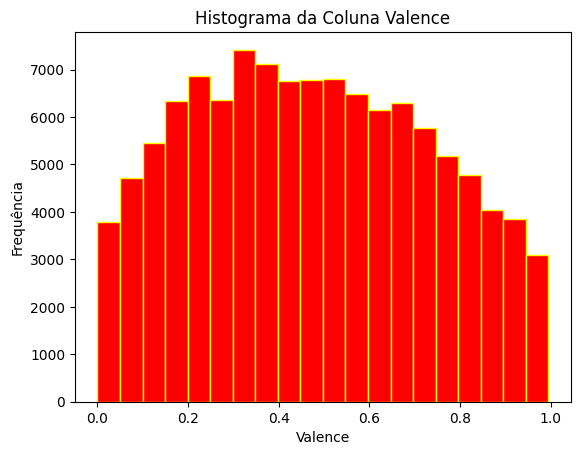

In [5]:
import matplotlib.pyplot as plt

# Analisando a coluna "valence" para criar a nossa target
plt.hist(df['valence'], bins=20, color='red', edgecolor='yellow')

# nomear a linha X
plt.xlabel('Valence')
# nomear a linha Y
plt.ylabel('Frequência')
# nomear a tabela
plt.title('Histograma da Coluna Valence')

# mostrar a tabela
plt.show()

In [ ]:
df['valence'].describe()

In [ ]:
# função que classifica a valência de uma música em:
# se maior que 0.5 "agitada"
# se menor que 0.5 "lenta"

def categorizar_valence(row):
  if row['valence'] > 0.5:
    return 'afgitada'
  else:
    return 'lenta'

  # Crie nova coluna 'target' usando a função categorizar_valence
df['target'] = df.apply(categorizar_valence, axis=1)
df.head()

In [ ]:
df.tail() # ver as 5 ultimas linhas

# **Feature Engineering**  🛠️

Como próximo passo, vamos armazenar em um novo dataframe apenas as colunas necessárias para nossa classificação de músicas.


In [ ]:
df.columns

In [ ]:
df_musica = df.drop(['Unnamed: 0', 'track_id'], axis=1)
df_musica.head()

# Tratando os dados categóricos 🅰️

**LabelEncoder**: Essa classe é utilizada para codificar rótulos de classes em números inteiros. É frequentemente usado quando se trabalha com algoritmos de aprendizado supervisionado que requerem rótulos numéricos. (ou One-Hot Encoding)

In [ ]:
def label_encoder_dataframe(df, columns_to_encode):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()

    for column in columns_to_encode:
        if column in df.columns:
            df[column] = le.fit_transform(df[column])
        else:
            print('A lista possui colunas que não existem no DataFrame.')

    return df

colunas_a_codificar = ['artists', 'album_name', 'track_name', 'explicit', 'track_genre', 'target']
label_encoder_dataframe(df_musica, colunas_a_codificar)
df_musica.head()

# Analisando as variáveis que vão compor nosso modelo 📊


In [ ]:
import seaborn as sns

correlation_matrix = df_musica.corr().round(2)

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")

# Entendendo o equilíbrio da target 🎯

In [ ]:
# Verificando o equilíbrio das classes
round(df_musica['target'].value_counts(normalize = True)*100,2)

In [ ]:
set(df['target'])

In [ ]:
set(df_musica['target'])

# Separando os dados em treino e teste 🔄

In [ ]:
df_musica.columns

In [ ]:
# separando os dados em treino e teste (método hold out)
from sklearn.model_selection import train_test_split

#X = df_musica.drop('target', axis=1)
X = df_musica[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'track_genre']]
y = df_musica['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=7)

In [ ]:
print(X_train.shape, X_test.shape)

# Normalizando os dados 📏
Ao aplicar o MinMaxScaler, todos os valores dos dados serão transformados para o intervalo entre 0 e 1, onde o valor mínimo será 0 e o valor máximo será 1. Essa técnica é especialmente útil quando os algoritmos de aprendizado de máquina são sensíveis à escala dos dados.

Por que aplicamos a normalização dos dados com as bases já separadas em treino e teste? 🤔
Se aplicarmos normalizações antes de dividir em conjuntos de treino e teste, podemos acabar introduzindo informações do conjunto de teste no conjunto de treino. Isso pode levar a uma avaliação otimista do desempenho do modelo, uma vez que o modelo terá visto parte dos dados de teste durante o treinamento. Este tipo de problema também é chamado de **Data Leak (vazamento de dados)**.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Criar uma instância do MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train) # aqui falar sobre data leak

X_train_escalonado = scaler.transform(X_train)
X_test_escalonado = scaler.transform(X_test)


# Criando uma função para executar modelos de machine learning 🚀

Vamos criar uma função que vai executar o modelo preditivo e avaliar a sua performance utilizando as principais métricas de validação.

In [19]:
def roda_modelo(modelo):

    from sklearn.metrics import roc_curve, roc_auc_score, classification_report

    # Treinando modelo com os dados de treino
    modelo.fit(X_train_escalonado, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(X_test_escalonado) # obter as probabilidades associadas às classes previstas para cada instância de dados
    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")

    # Fazendo a predicao dos dados de teste e calculando o classification report
    predicao = modelo.predict(X_test_escalonado)
    print("\nClassification Report")
    print(classification_report(y_test, predicao))

    print("\nRoc Curve\n")
    # Fazer previsões de probabilidades
    y_pred_probs = modelo.predict_proba(X_test_escalonado)[:, 1]

    # Calcular a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

    # Calcular a AUC (área sob a curva ROC)
    auc = roc_auc_score(y_test, y_pred_probs)

    # Plotar a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})') # linewidth
    plt.plot([0, 1], [0, 1], color='gray',linestyle='--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Converter probabilidades em classes preditas (0 ou 1)
    y_pred = (y_pred_probs > 0.5).astype(int)

# Regressão logística
O modelo se baseia em uma **função logística**, que transforma as variáveis independentes em uma probabilidade entre 0 e 1.  Para novas entradas de dados, o modelo calcula a **probabilidade do evento binário ocorrer**.

In [ ]:
from sklearn.linear_model import LogisticRegression
modelo_logistico = LogisticRegression()
roda_modelo(modelo_logistico)

# KNN (K-Nearest Neighbors)
Para um novo ponto de dados, o KNN identifica os **K pontos mais próximos (vizinhos)** no conjunto de treinamento. A classe do novo ponto é a classe mais frequente entre os K vizinhos.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier(n_neighbors=3)
roda_modelo(modelo_knn)

# Random Florest
O Random Forest Classifier é um algoritmo de **ensemble learning**, que **combina vários modelos para melhorar a performance**. O modelo cria uma floresta de árvores de decisão, onde cada árvore é treinada em um subconjunto aleatório dos dados (bootstrap). A classe final do novo ponto de dados é a classe mais votada pelas árvores da floresta.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelo_random_forest = RandomForestClassifier(max_depth=7, n_estimators= 100)
roda_modelo(modelo_random_forest)

# Testando novos parâmetros com Grid Search

Esse teste pode demorar um pouquinho!

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defina os parâmetros a serem testados
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15]
}

# GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=1)

# Ajuste o modelo ao conjunto de dados
grid_search.fit(X_train_escalonado, y_train)

rf_params = grid_search.best_params_
print("Melhores hiperparâmetros:", rf_params)


Melhores hiperparâmetros: {'max_depth': 15, 'n_estimators': 300}

Testando com os melhores parametros encontrados.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelo_random_forest_gs = RandomForestClassifier(max_depth=15, n_estimators= 300)
roda_modelo(modelo_random_forest_gs)

# Testando o modelo 😊

In [ ]:
import numpy as np

novos_dados = pd.read_excel("novos_dados.xlsx")
base_original = pd.read_excel("novos_dados.xlsx")

#Criando a pipeline
coluna = ['track_genre']
label_encoder_dataframe(novos_dados, coluna)
novos_dados = scaler.transform(novos_dados)

# Realize a previsão usando o modelo Random Forest treinado
previsoes = modelo_random_forest_gs.predict(novos_dados)

# Obtendo o predict
def mapear_valor(valores):
    resultados = []
    for valor in valores:
        if valor == 0:
            resultados.append('Música agitada')
        elif valor == 1:
            resultados.append('Música lenta')
        else:
            resultados.append('Desconhecido')
    return np.array(resultados)

base_original['target'] = mapear_valor(previsoes)
base_original.head()